# Introduction of new Python Package/Tool




In [ ]:
# All import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

import warnings
warnings.filterwarnings('ignore')

#code to ensure path
# Packages Explored in Module
#import typicalPackages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# New Tool for This Project
#import newPackage
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest



from EDA_FA import analysisClass_FA
from EDA_FA import makeAFigure_FA
from preprocessor_JT import remove_outliers_JT
from preprocessor_JT import normalize_df_JT
from Train_Model_AM import MLTrainer_AM
from Compare_Models_GH import compare_models_performance_GH, visualize_model_performance_GH

# 1. Frame the Problem
---

**Objective:**

The primary objective of this project is to utilize machine learning techniques to develop accurate predictive models for identifying individuals at risk of diabetes. This entails leveraging data from the "diabetes_binary_health_indicators_BRFSS2015.csv" dataset to create models capable of classifying individuals into two categories: those with no diabetes and those with prediabetes or diabetes.

**Importance:**

Diabetes is a significant public health concern in the United States, impacting millions of individuals and imposing substantial economic burdens. Early detection of diabetes risk is critical for implementing timely interventions and improving health outcomes. Therefore, developing effective predictive models for diabetes risk assessment is essential for supporting public health initiatives and healthcare management strategies.


**Scope:**

The project encompasses several stages, including exploratory data analysis (EDA), data preprocessing, feature selection, model development, and evaluation. Through these processes, the goal is to build robust predictive models capable of accurately identifying individuals at risk of diabetes based on the available features from the BRFSS survey data.

**Outcome:**

By addressing the key questions outlined above and developing effective predictive models, this project aims to contribute to the advancement of diabetes risk assessment tools. Ultimately, the goal is to support public health efforts and healthcare management strategies aimed at preventing and managing diabetes more effectively.







# 2. Collect Data
---



**Dataset:**

For this project, the dataset chosen is the "diabetes_binary_health_indicators_BRFSS2015.csv" dataset. This dataset is readily available and publicly accessible, sourced from the Behavioral Risk Factor Surveillance System (BRFSS) conducted by the CDC in 2015. The dataset comprises 253,680 survey responses and is well-documented at its source, providing comprehensive descriptions of data features and the methods of acquisition. It meets the criteria of being freely accessible without requiring any financial payment. Additionally, the dataset aligns with the project's objectives as it contains relevant health indicators and risk factors associated with diabetes. Sources at: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_health_indicators_BRFSS2015.csv

**Characteristics Assessment:**

The selected dataset is suitable for analysis as it contains a sufficient number of records and features to conduct comprehensive exploratory data analysis (EDA) and develop predictive models. The presence of 21 feature variables, along with the target variable "Diabetes_binary," allows for the exploration of various factors influencing diabetes risk. Moreover, the dataset's interpretable format facilitates ease of understanding and manipulation for analysis purposes.

**Social, Legal, and Ethical Considerations:**

In selecting this dataset, due consideration has been given to potential social, legal, and ethical concerns. The dataset originates from a reputable source, the CDC, and is anonymized to protect the privacy of survey respondents. Ethical considerations regarding data usage and privacy have been taken into account throughout the project to ensure responsible handling of sensitive health information. Additionally, the analysis conducted aims to contribute positively to public health initiatives by developing models for diabetes risk assessment and management.

In [ ]:
# Code to read in data
try:
  drive_path
except NameError:
  drive_path = ''

df= pd.read_csv(drive_path + 'diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 3. Exploratory Data Analysis
---


### Basic Exploratort Data Analsysis :

<h3 style="color:#8B0000;"> Display the first a few rows of the dataset: </h3>

In [ ]:
# Print the message indicating the display of the first few rows of the dataset
print("First few rows of the dataset: \n")

# Display the first five rows of the dataset
df.head()


First few rows of the dataset: 



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h3 style="color:#8B0000;"> Display the shape of the dataset: </h3>

In [ ]:
# Print the message indicating the dataset shape (number of rows and number of columns)
print("Dataset Shape (Number of Rows and Number of Columns):", df.shape)


Dataset Shape (Number of Rows and Number of Columns): (253680, 22)


<h3 style="color:#8B0000;"> Display the column names of the features in the dataset: </h3>

In [ ]:
# Print the dataset column names
print("Dataset Column Names:\n", df.columns)


Dataset Column Names:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


<h3 style="color:#8B0000;">  Displaying the data types of columns in the data DataFrame: </h3>

In [ ]:
# Display the data types of each variable
print('Data types of each variable is given:\n', df.dtypes)


Data types of each variable is given:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


<h3 style="color:#8B0000;"> Finding duplicate rows in the  DataFrame: </h3>

In [ ]:
# Find duplicate rows in the DataFrame
duplicate_data = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows in the dataset:\n")
print(duplicate_data)


Duplicate rows in the dataset:

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242                1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563                0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700                0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160                0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332                0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492              1.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  P

<h3 style="color:#8B0000;"> Make an instance of analysisClass_FA  class from EDA_FA Module: </h3>

In [ ]:
# Create an instance of the analysisClass_FA class with the DataFrame df
analysisClass_FA_var = analysisClass_FA(df)

<h3 style="color:#8B0000;"> Call the BasicEDA() function for performing the additional Exploratory data analysis  </h3>

this function is  contains the code from external of module, and it tells about the Summary Statistics, Information about the Dataset and Check the Missing

In [ ]:
# Perform basic exploratory data analysis using the analysisClass_FA instance
analysisClass_FA_var.BasicEDA()



Categorical variables:
 Index([], dtype='object')

Quantitative variables:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


Summary Statistics of Numerical Variables:

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000      

**Description and Discoveries from Exploratory Data Analysis (EDA):**


**Dataset Overview:**

The dataset consists of 253,680 entries and 22 columns/features.

**Data Types:**

All columns are of numeric type (float64).

**Summary Statistics:**

The summary statistics reveal the mean, standard deviation, minimum, maximum, and quartile values for each numerical feature.
For example, the mean BMI is approximately 28.38 with a standard deviation of 6.61.

**Duplicate Rows:**

There are duplicate rows in the dataset, as indicated by the presence of rows with identical feature values.

**Missing Values:**

There are no missing values in the dataset, as all columns have a count of non-null values equal to the total number of entries.

**Discoveries:**

**Imbalanced Classes:**

The Diabetes_binary feature shows an imbalance in classes, with the majority being non-diabetic cases (approximately 86.1%).

**Numerical Features:**

The dataset contains a mix of binary indicators (e.g., HighBP, HighChol) and continuous variables (e.g., BMI, Age).
Some features represent health indicators such as blood pressure, cholesterol levels, BMI, etc.

**No Categorical Variables:**

There are no categorical variables present in the dataset. All features are either binary or continuous numerical variables.

**Age Distribution:**

The Age feature ranges from 1 to 13, indicating age groups or categories.

**Education and Income:**

The Education and Income features are discrete numerical variables representing education level and income category, respectively.

Overall, the dataset seems to be well-preprocessed with no missing values, but it exhibits class imbalance, which may need to be addressed during modeling, especially for predictive tasks like diabetes classification.

### Univariate Data Analsysis :

<h3 style="color:#8B0000;"> Bar graph to show the value distribution for Target (Diabetes_binary): </h3>

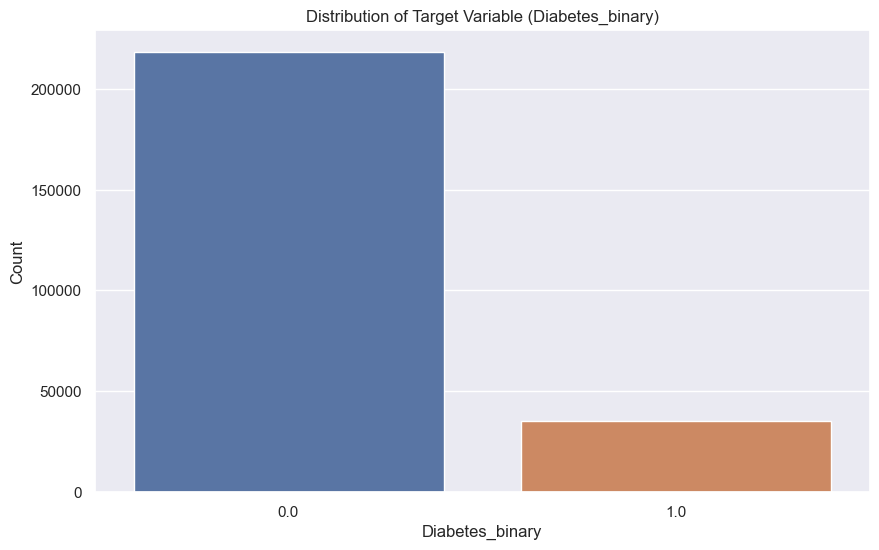

In [ ]:
# Set the figure size for the count plot
plt.figure(figsize=(10, 6))

# Create a count plot for the target variable 'Diabetes_binary'
sns.countplot(x='Diabetes_binary', data=df)

# Set the title of the plot
plt.title('Distribution of Target Variable (Diabetes_binary)')

# Set labels for the x and y axes
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')

# Display the plot
plt.show()


The graph above shows the imbalance in the distribution of target variable values

<h3 style="color:#8B0000;">  Divide dataset into two - diabetes and no_diabetes: </h3>

In [ ]:
# Create a DataFrame containing only non-diabetic individuals
df_no = df[df['Diabetes_binary'] == 0]

# Create a DataFrame containing only diabetic individuals
df_yes = df[df['Diabetes_binary'] == 1]


<h3 style="color:#8B0000;">  Check Age distribution for people with diabetes: </h3>

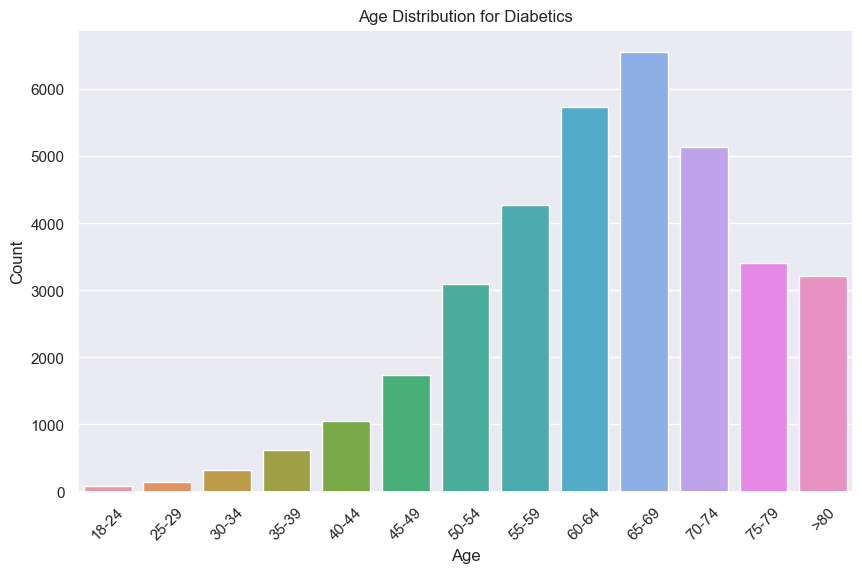

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a count plot for the age distribution of diabetic individuals
ax = sns.countplot(data=df_yes, x='Age')

# Set the title of the plot
ax.set(title='Age Distribution for Diabetics')

# Set custom labels for x-axis ticks with specified age groups and rotate them for better readability
ax.set_xticklabels(
    ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation=45)

# Set the label for x-axis and y-axis
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


As we can see that most of people are falling with the Age range of 55-59 to 70-74.

<h3 style="color:#8B0000;"> Plotting BMI Histogram distribution using makeAFigure_FA function from EDA_FA module : </h3>

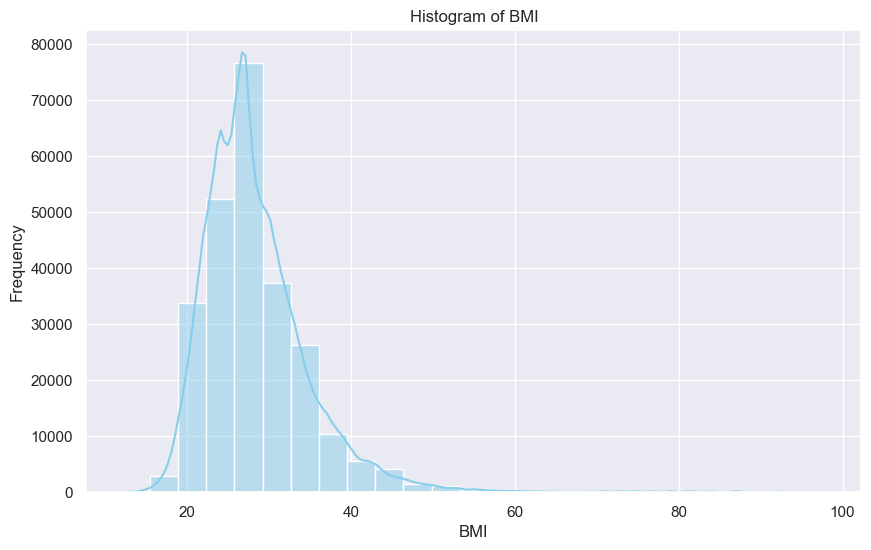

In [ ]:
# Function call to make a figure with specified data, feature ('BMI'), and plot type ('histogram')
makeAFigure_FA(df, 'BMI', None, 'hist')


The histogram for BMI is rightly skewed showing that it has got some outlier values in it.

<h3 style="color:#8B0000;"> Call the UnivariateEDA() function from EDA_FA module for performing the additional Univariate Exploratory Data Analysis  </h3>

This function UnivariateEDA() provides additional univariate EDA and it is defined in the external of module EDA_FA, and it  makes the graphs for the univariate data analysis for
Income, Education, HighBP, HighChol and Smoker.

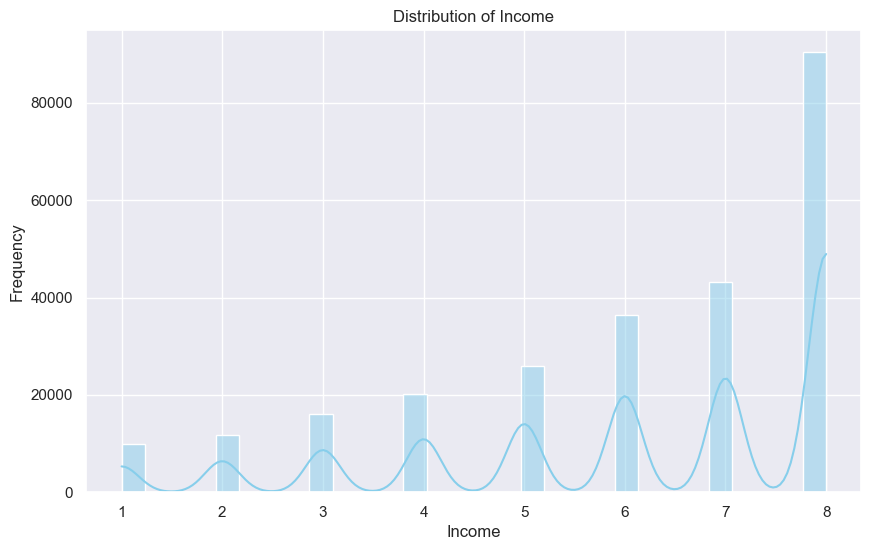

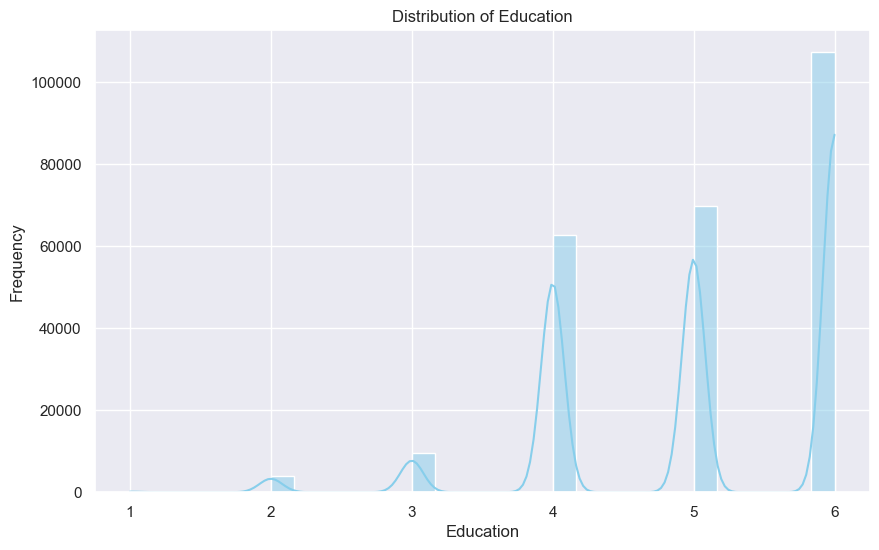

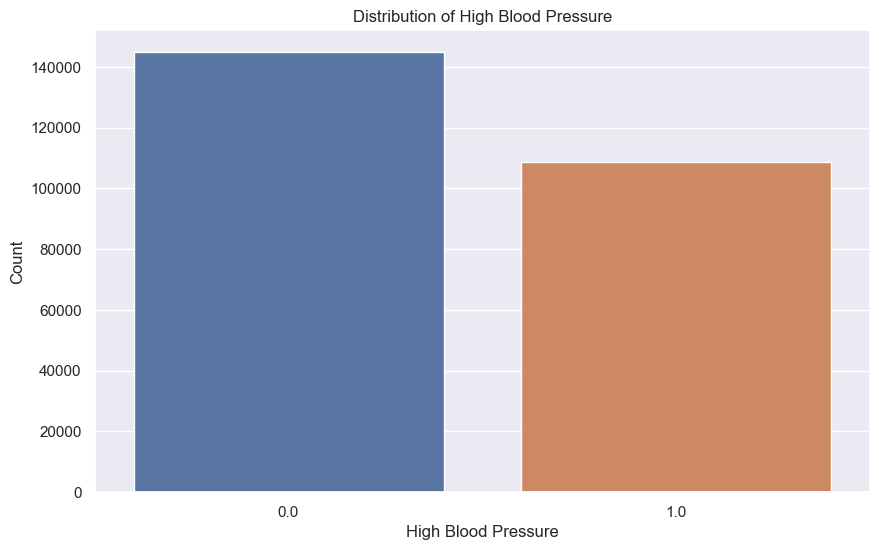

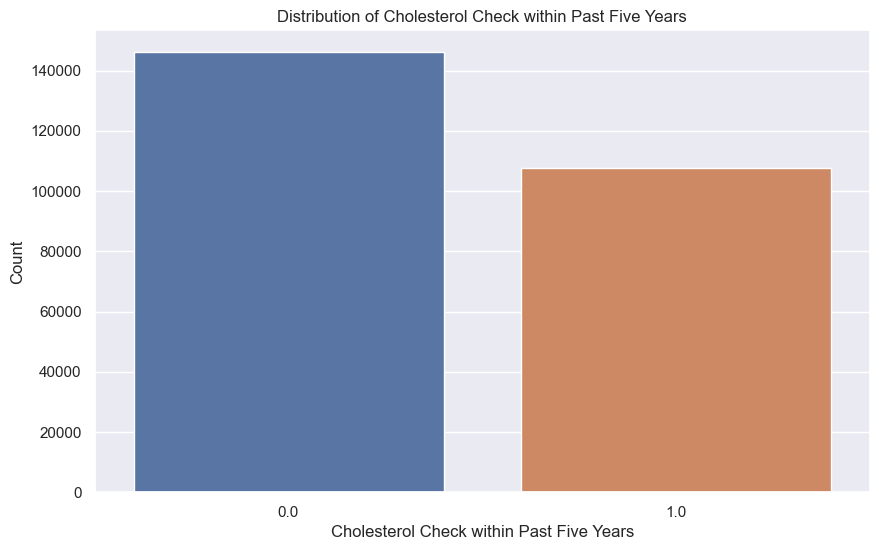

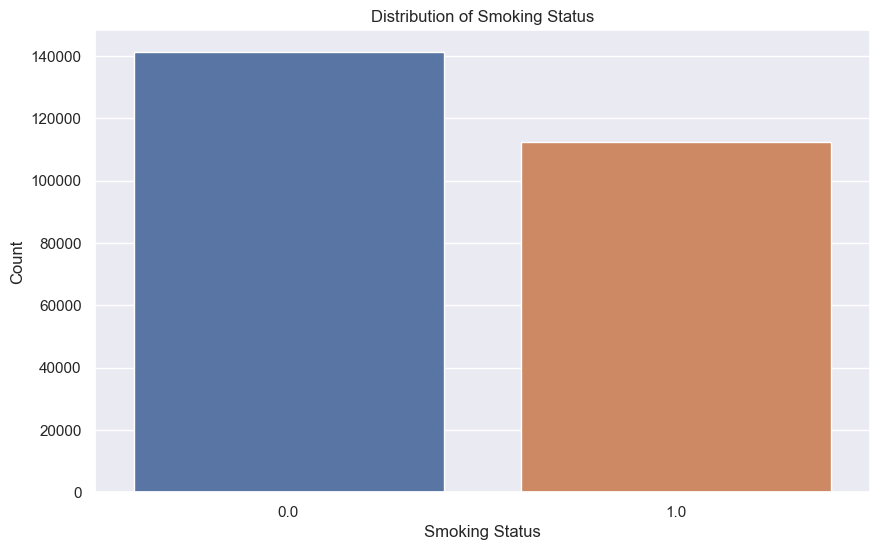

In [ ]:
# Calling the UnivariateEDA method of analysisClass_FA_var object to perform univariate exploratory data analysis on the dataframe df
analysisClass_FA_var.UnivariateEDA(df)


**Noteworthy Discoveries from Univariate Data Analysis:**

**Distribution of Diabetes:**

The bar graph representing the distribution of the target variable Diabetes_binary reveals a significant class imbalance, with a higher count of non-diabetic individuals compared to diabetic individuals. This highlights the need for addressing class imbalance during modeling.

**Age Distribution for Diabetics:**

The age distribution plot for individuals with diabetes shows that the majority fall within the age range of 55-59 to 70-74. This suggests that diabetes prevalence tends to increase with age, peaking around the age of 60-70.

**BMI Distribution:**

The histogram of BMI demonstrates a right-skewed distribution, indicating the presence of outliers. This suggests that some individuals have BMI values significantly higher than the average, which might be indicative of obesity, a known risk factor for diabetes.

**Income and Education Distribution:**

The histograms of income and education levels show the distribution of these variables within the dataset. Understanding the distribution of income and education levels can provide insights into potential socioeconomic factors associated with diabetes prevalence. Most of people have income at around 8, and education till level 6.

**High Blood Pressure, Cholesterol Check, and Smoking Status:**

The count plots for high blood pressure, cholesterol check within the past five years, and smoking status provide insights into the prevalence of these risk factors among the individuals in the dataset. High prevalence of these risk factors can contribute to the likelihood of developing diabetes and other chronic conditions.

Overall, the univariate data analysis highlights several key insights into the distribution of variables within the dataset and their potential associations with diabetes prevalence. Further analysis and modeling can delve deeper into exploring these relationships and identifying predictors of diabetes.

### Multivariate Data Analsysis :

<h3 style="color:#8B0000;"> Plotting BMI distribution with respect to the target variable (Diabetic_binary) </h3>



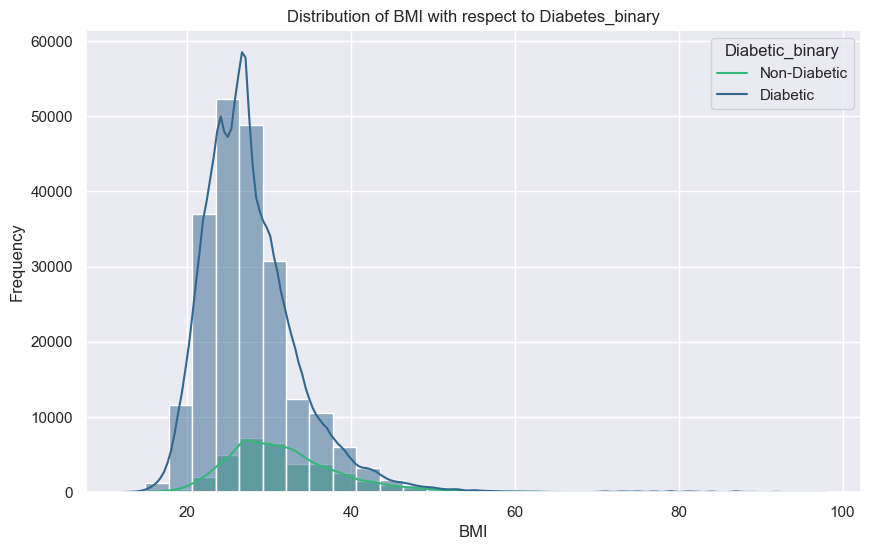

In [ ]:
# Creating a figure with a specified size
plt.figure(figsize=(10, 6))

# Creating a histogram plot of BMI with respect to the target variable Diabetes_binary
# using seaborn's histplot function
sns.histplot(x='BMI', hue='Diabetes_binary', data=df, bins=30, kde=True, palette='viridis')

# Adding a title to the plot
plt.title('Distribution of BMI with respect to Diabetes_binary')

# Adding labels to the x and y axes
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Adding a legend to differentiate between non-diabetic and diabetic individuals
plt.legend(title='Diabetic_binary', labels=['Non-Diabetic', 'Diabetic'])

# Displaying the plot
plt.show()


From the graph it  can be observed that for both non diabtic and diabetic the general BMI values fall within 20 to 40, with a few exception around 90 which is obviously outliers.

<h3 style="color:#8B0000;">  Plotting GenHlth distribution with respect to the target variable (Diabetic_binary)  </h3>



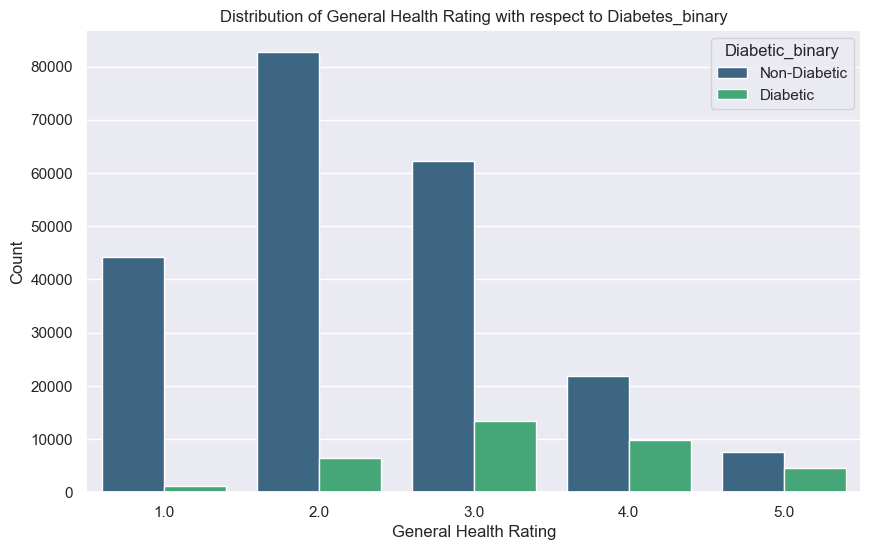

In [ ]:
# Creating a figure with a specified size
plt.figure(figsize=(10, 6))

# Creating a count plot of General Health Rating with respect to the target variable Diabetes_binary
# using seaborn's countplot function
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df, palette='viridis')

# Adding a title to the plot
plt.title('Distribution of General Health Rating with respect to Diabetes_binary')

# Adding labels to the x and y axes
plt.xlabel('General Health Rating')
plt.ylabel('Count')

# Adding a legend to differentiate between non-diabetic and diabetic individuals
plt.legend(title='Diabetic_binary', labels=['Non-Diabetic', 'Diabetic'])

# Displaying the plot
plt.show()


From the graph it  can be observed that most diabetic people have Genral Health rating of 3 and 4.

<h3 style="color:#8B0000;"> Call the MultivariateEDA() function from EDA_FA module for performing the additional Multivariate Exploratory Data Analysis  </h3>

This function MultivariateEDA() provides additional multivariate EDA and plots and it is defined in the external of module EDA_FA, and it  makes the graphs for the multivariate data analysis for different variables(BMI, Mental Health, Physical Health, Age, Education, and Income) with respect to the target variable Diabetic_binary.

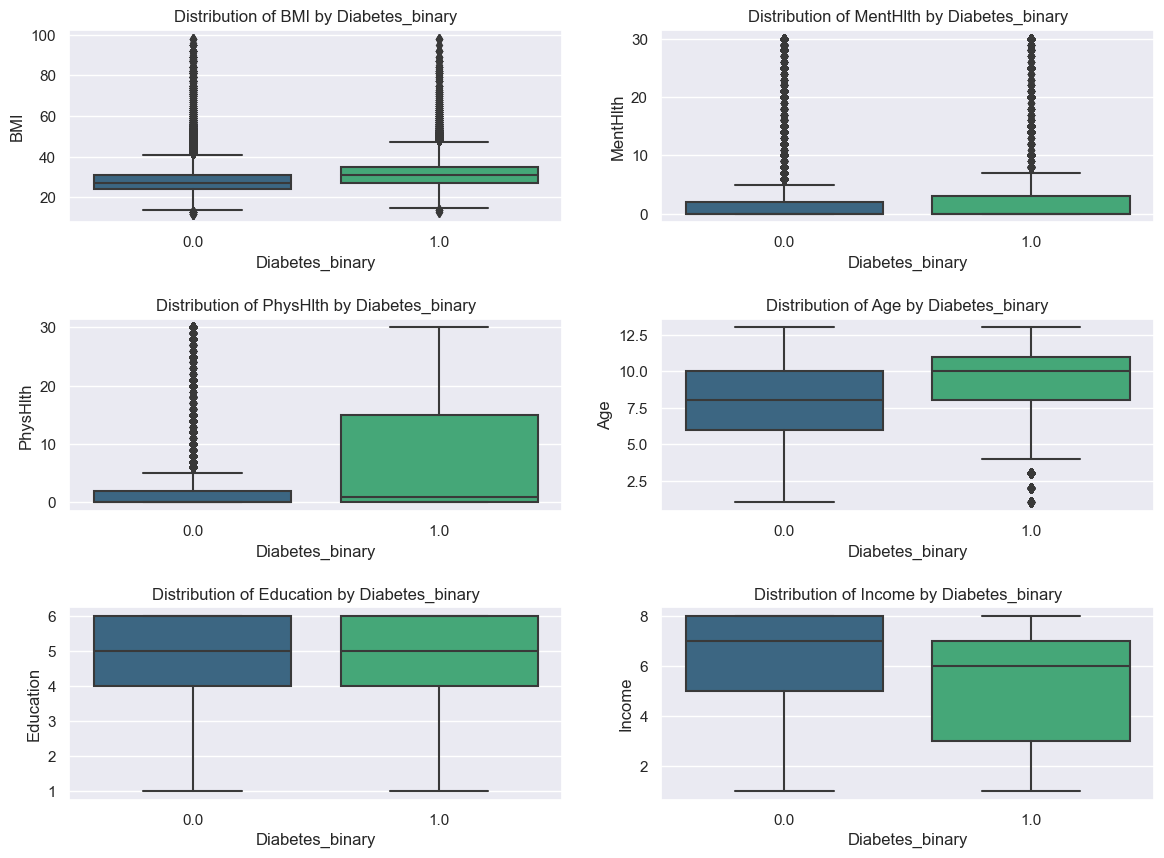

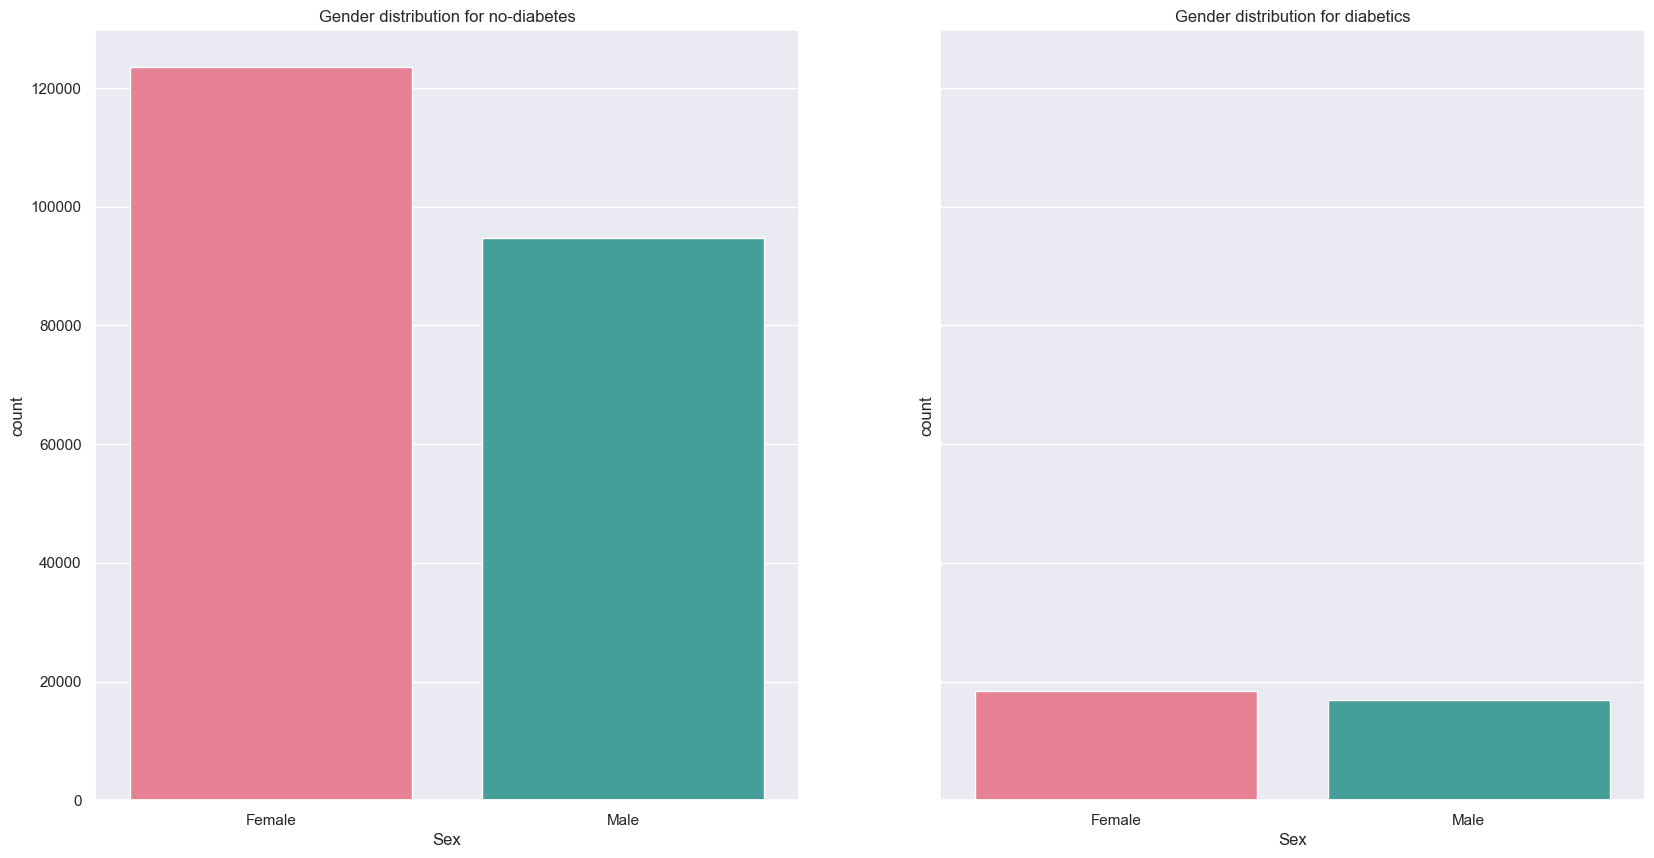

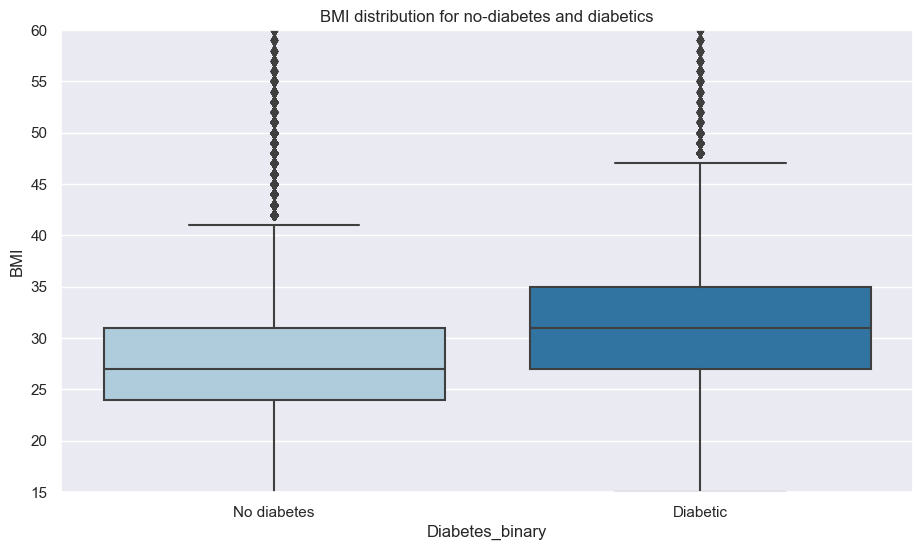

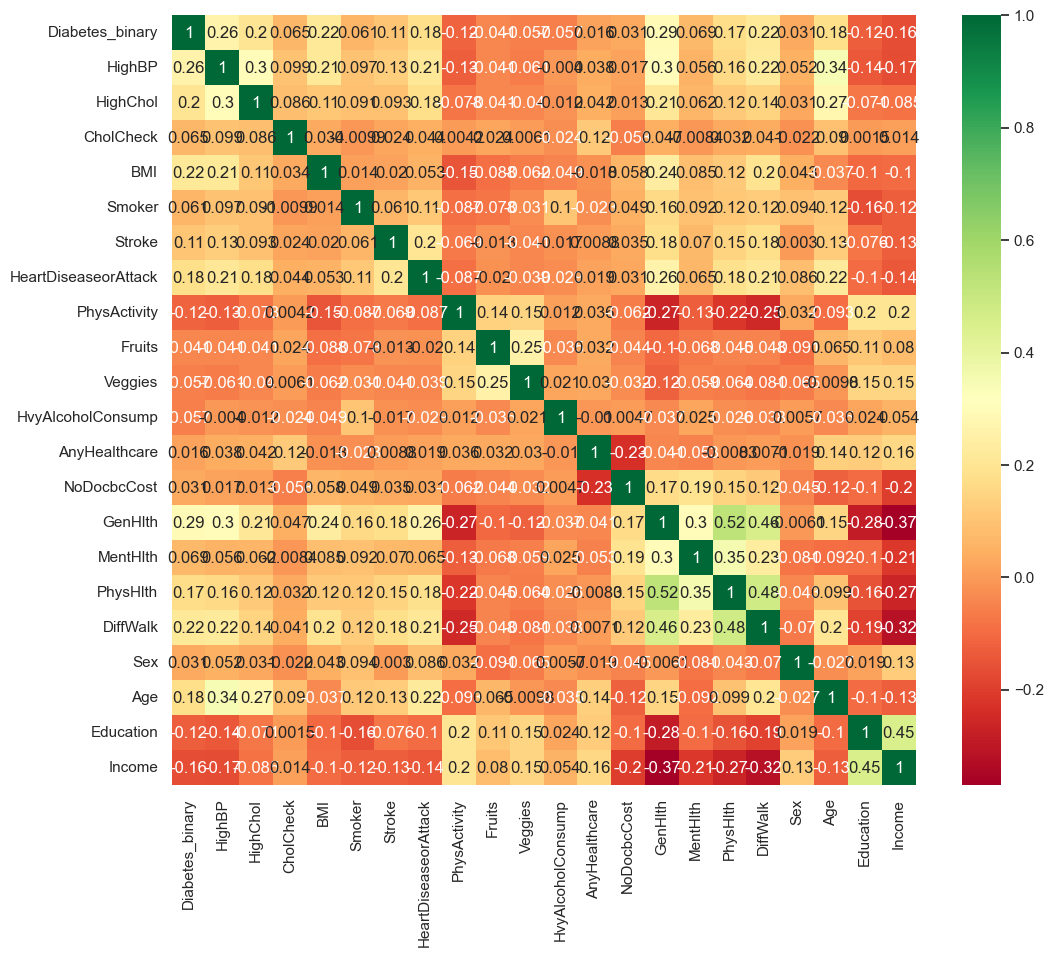

In [ ]:
# Performing multivariate exploratory data analysis using the analysisClass_FA_var object
analysisClass_FA_var.MultivariateEDA(df)


**Noteworthy Discoveries from Multivariate Data Analysis:**

**BMI Distribution with Respect to Diabetes:**

The histogram plot of BMI with respect to the target variable Diabetes_binary reveals that the majority of individuals, both non-diabetic and diabetic, have BMI values ranging from 20 to 40. However, there are some outliers with BMI values around 90, indicating extreme obesity. This suggests that while there is a general range of BMI values for both groups, extreme values may be associated with diabetes.

**General Health Rating and Diabetes:**

The count plot of general health rating (GenHlth) with respect to the target variable Diabetes_binary shows that most diabetic individuals have general health ratings of 3 and 4. This indicates that individuals with diabetes tend to report moderate to good general health, which may be influenced by factors such as disease management and lifestyle choices.

**Comparison of Numerical Features:**

Boxplots comparing numerical features such as BMI, mental health (MentHlth), physical health (PhysHlth), age, education, and income between non-diabetic and diabetic individuals provide insights into potential associations between these features and diabetes. For instance, the boxplot of BMI distribution shows a clear difference between non-diabetic and diabetic individuals, with diabetic individuals generally having higher BMI values. Furthermore these box plots show that some variables has got outliers present hence we may need to remove outliers later in preprocessing.

**Gender Distribution:**

The count plots of gender distribution for both non-diabetic and diabetic individuals provide insights into the gender distribution within each group. While there may not be significant differences in gender distribution between the two groups, analyzing gender distribution can help identify potential gender-specific trends in diabetes prevalence.

**Correlation Heatmap:**

The correlation heatmap provides a visual representation of the pairwise correlations between different numerical features in the dataset. This allows for the identification of potential correlations between features, which can help in understanding the underlying relationships and identifying important predictors of diabetes.

Overall, the multivariate data analysis provides valuable insights into the relationships between various features and diabetes prevalence, shedding light on potential predictors and associations that can inform further analysis and modeling.

# 4. Data Pre-Processing


<h3 style="color:#8B0000;"> Remove Outliers from the dataset by calling remove_outliers_JT() function from preprocessor_JT module :  </h3>

From the EDA above we can observe that significant outliers are present in different variables of dataset hence,
This function remove_outliers_JT() provides additional support in eleiminating the ourliers from the dataset using IQR approach.
it is defined in the external of module preprocessor_JT to make the preprocessing more sophisticated.

In [ ]:
# List of numerical features for outlier removal
numerical_features = ['BMI', 'GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']

# Remove outliers from the dataframe based on numerical features
df_no_outliers = remove_outliers_JT(df, numerical_features)

# Reset index of the dataframe after removing outliers
df_no_outliers = df_no_outliers.reset_index(drop=True)

# Display the dataframe without outliers
df_no_outliers


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
2,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
3,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
4,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
185758,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
185759,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
185760,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<h3 style="color:#8B0000;"> Plotting BMI Histogram distribution after removing Outliers using makeAFigure_FA function from EDA_FA module:  </h3>

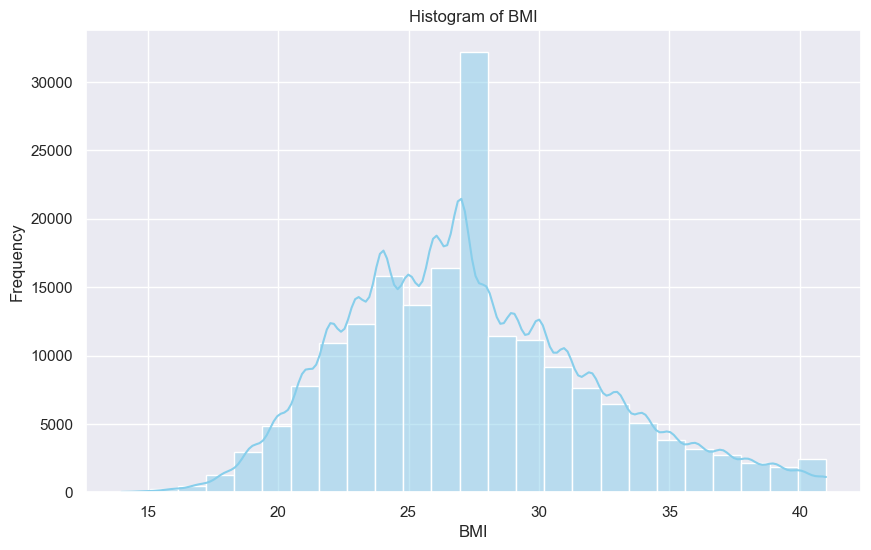

In [ ]:
# Create a histogram for the 'BMI' feature in the dataframe without outliers
makeAFigure_FA(df_no_outliers, 'BMI', None, "hist")


After removing outliers from the dataset using IQR we can obsevre that the BMI distribution seems to follow uniform distribution.

<h3 style="color:#8B0000;"> Feature Selection using SelectKbest:  </h3>

In [ ]:
# Separate the features (X) and target variable (y)
X = df_no_outliers.loc[:, df_no_outliers.columns != 'Diabetes_binary']
y = df_no_outliers.loc[:, df_no_outliers.columns == 'Diabetes_binary']


In [ ]:
# Select the top 15 features using the chi-squared test
select_feature = SelectKBest(chi2, k=15).fit(X, y)

# Get the names of the selected features
kbest = np.asarray(X.columns)[select_feature.get_support()]
kbest


array(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype=object)

<h3 style="color:#8B0000;"> Plot the scores used for the attribute selection </h3>

<Axes: xlabel='score', ylabel='Feature'>

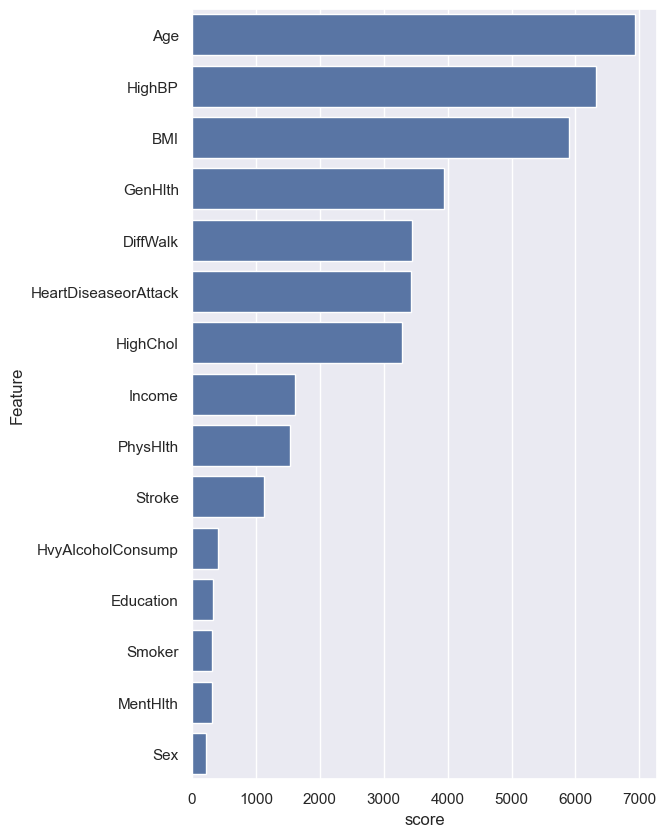

In [ ]:
# Create a DataFrame to store the scores of the selected features
score = pd.DataFrame(select_feature.scores_, X.columns).sort_values(0, ascending=False).reset_index().head(15).rename(columns={0: "score", "index": "Feature"})

# Create a bar plot to visualize feature scores
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(data=score, x="score", y="Feature", color="b")


<h3 style="color:#8B0000;"> How the reduced dataset looks like: </h3>

In [ ]:
# Select the top 15 features identified by the chi-squared test
X_kbest = X.loc[:, kbest]
X_kbest


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,1.0,0.0,27.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
2,1.0,1.0,24.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
3,1.0,1.0,25.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
4,1.0,1.0,25.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185757,0.0,0.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
185758,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
185759,0.0,0.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
185760,1.0,0.0,23.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0




<h3 style="color:#8B0000;"> Use SMOTE to handle class imbalance in dataset: </h3>

As we observed that we have class imbalance in the values of target variable diabetic_binary, hence we need to upsample the class variable values to have a class balance.

In [ ]:
# Importing the SMOTE module from imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE
s = SMOTE()

# Resampling the dataset using SMOTE to handle class imbalance
X_, y_ = s.fit_resample(X_kbest, y)


To install the imbalanced-learn library, which includes the SMOTE module, into your Anaconda environment, you can use the following command:

    conda install -c conda-forge imbalanced-learn

This command will install the latest version of imbalanced-learn from the conda-forge channel.

After installation, you can import the SMOTE module in your Python code using:

    from imblearn.over_sampling import SMOTE


<h3 style="color:#8B0000;"> A bar plot to show the balance in the values of Diabetes_binary using makeAFigure_FA function from EDA_FA module:  </h3>

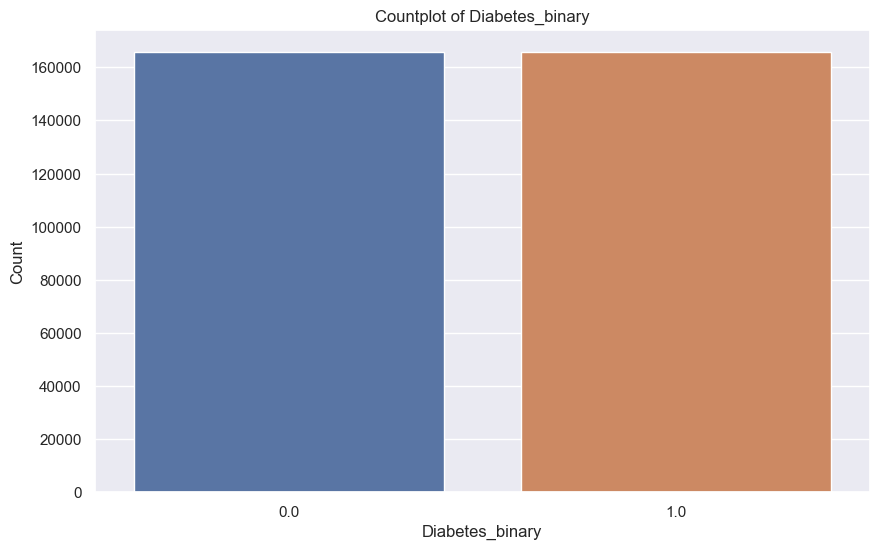

In [ ]:
# Visualizing the balance in the values of the target variable after applying SMOTE
makeAFigure_FA(y_, 'Diabetes_binary', None, 'bar')


<h3 style="color:#8B0000;"> Standardize the feature values by calling normalize_df_JT() function from preprocessor_JT module :  </h3>

To provide additional support to data preprocessing step we standardize the values of the dataset between 0 and 1, by calling normalize_df_JT() function from preprocessor_JT module which in fact uses StandardScaler to perform data scaling.

In [ ]:
# Standardizing the feature values between 0 and 1
X_scaled = normalize_df_JT(X_)

# Renaming columns to match the original feature names
X_scaled.columns = X_kbest.columns

# Displaying the standardized features
X_scaled


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-1.116935,-1.051545,-0.702346,1.159261,-0.209289,-0.362398,-0.2079,0.598447,-0.387732,-0.471419,-0.386774,-1.016826,-0.607193,1.004361,-2.572840
1,0.943035,-1.051545,-0.302339,-0.919058,-0.209289,-0.362398,-0.2079,-0.562922,-0.387732,-0.471419,-0.386774,-1.016826,0.797307,-2.092881,-0.045219
2,0.943035,1.009863,-0.902349,-0.919058,-0.209289,-0.362398,-0.2079,-0.562922,2.199867,-0.471419,-0.386774,-1.016826,0.797307,-0.028053,-1.056267
3,0.943035,1.009863,-0.702346,1.159261,-0.209289,-0.362398,-0.2079,-0.562922,-0.387732,0.780737,-0.386774,1.043408,0.446182,1.004361,0.965830
4,0.943035,1.009863,-0.702346,1.159261,-0.209289,-0.362398,-0.2079,0.598447,-0.387732,-0.471419,2.870601,-1.016826,0.797307,-1.060467,-1.056267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331647,0.943035,-1.051545,0.097667,1.159261,-0.209289,-0.362398,-0.2079,0.598447,-0.387732,-0.471419,0.153323,1.043408,1.441338,-2.092881,-0.972448
331648,0.943035,-1.051545,0.697677,1.159261,-0.209289,-0.362398,-0.2079,0.598447,-0.387732,-0.471419,-0.386774,-0.126777,0.095057,1.004361,0.460306
331649,0.943035,1.009863,-0.111997,1.058874,-0.209289,-0.362398,-0.2079,-0.506825,1.337334,-0.471419,-0.386774,-1.016826,0.463142,-1.060467,-1.080685
331650,0.943035,0.446967,-0.902349,1.159261,-0.209289,-0.362398,-0.2079,0.598447,-0.387732,-0.471419,-0.386774,1.043408,1.244311,-0.778552,-1.056267


**Useful Discoveries from Data Preprocessing:**

**Outlier Removal:**

Utilizing the remove_outliers_JT() function, significant outliers were successfully removed from the dataset using the Interquartile Range (IQR) method. This process aids in improving the robustness of subsequent analyses by eliminating extreme data points that may skew the results.

**Feature Selection:**

Through the application of the SelectKBest method with a chi-squared test, the top 15 features most relevant to predicting diabetes were identified. These features include 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', and 'Income'. This selection process allows for the focus on the most informative features, potentially improving model performance and interpretability.

**Class Imbalance Handling:**

Addressing class imbalance in the target variable ('Diabetes_binary') was crucial for ensuring model effectiveness. The Synthetic Minority Over-sampling Technique (SMOTE) was applied to upsample the minority class, thus achieving a more balanced distribution of class labels. This step is essential for preventing the model from being biased towards the majority class and potentially improving its ability to generalize to unseen data.

**Data Standardization:**

Standardizing the feature values between 0 and 1 using the normalize_df_JT() function enhances the interpretability of the data and ensures that all features contribute equally to the analysis. This step is particularly important for algorithms that rely on distance measures or gradient descent optimization, as it prevents features with larger scales from dominating the model training process.

**Visualization of Data Balance:**

A bar plot was generated to visually represent the balance in the values of the Diabetes_binary variable after applying SMOTE. This visualization provides insights into how the class distribution has been adjusted to mitigate class imbalance.

Overall, these preprocessing steps enhance the quality of the dataset, address inherent challenges such as outliers and class imbalance, and prepare the data for subsequent modeling tasks, ultimately improving the performance and reliability of predictive models for diabetes detection.

# 5. In-Depth Analysis




<h3 style="color:#8B0000;">  Split the dataset into training and testing sets using (80:20) ratio: </h3>


In [ ]:
# Importing necessary libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X_scaled: standardized features
# y_: target variable
# test_size: proportion of the dataset to include in the test split
# random_state: seed for random number generation for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_, test_size=0.2, random_state=0)


### Logistic Regression Classifier:

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for LogisticRegression  :  </h3>

In [ ]:
Lr_Classifier = MLTrainer_AM(LogisticRegression())

<h3 style="color:#8B0000;"> Train the Logistic Regression Model using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Lr_Classifier.train_model(X_train, y_train)

LogisticRegression()


<h3 style="color:#8B0000;">  To get the weights of all the variables Logistic Regression: </h3>

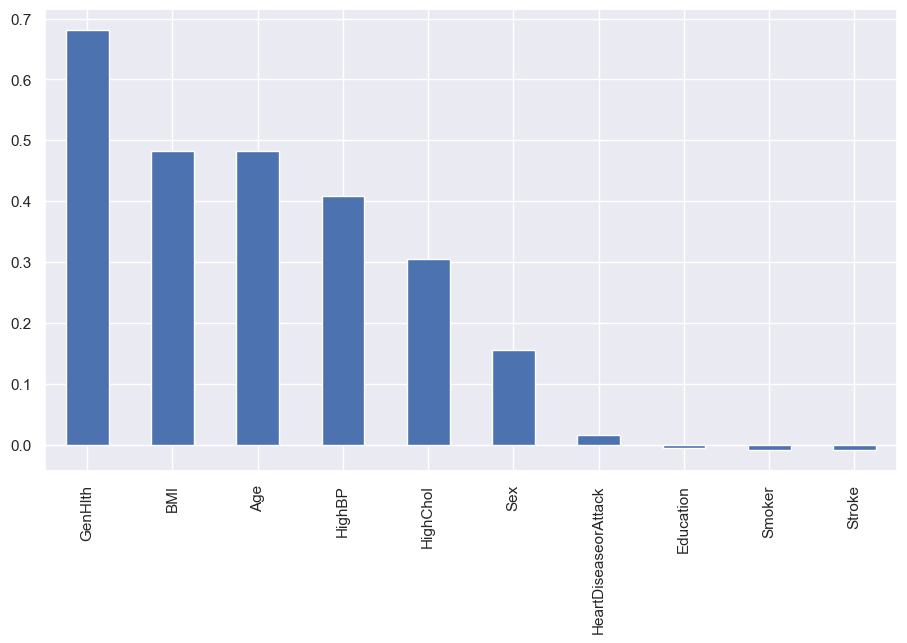

In [ ]:
# Calculating the weights of all variables in Logistic Regression
# Coefficients are obtained from the trained Logistic Regression model
weights = pd.Series(Lr_Classifier.train_model(X_train, y_train).coef_[0], index=X_train.columns.values)

# Sorting the weights in descending order and selecting the top 10
top_weights = weights.sort_values(ascending=False)[:10]

# Plotting the top weighted features
top_weights.plot(kind='bar')
plt.show()


Axes(0.125,0.11;0.775x0.77)


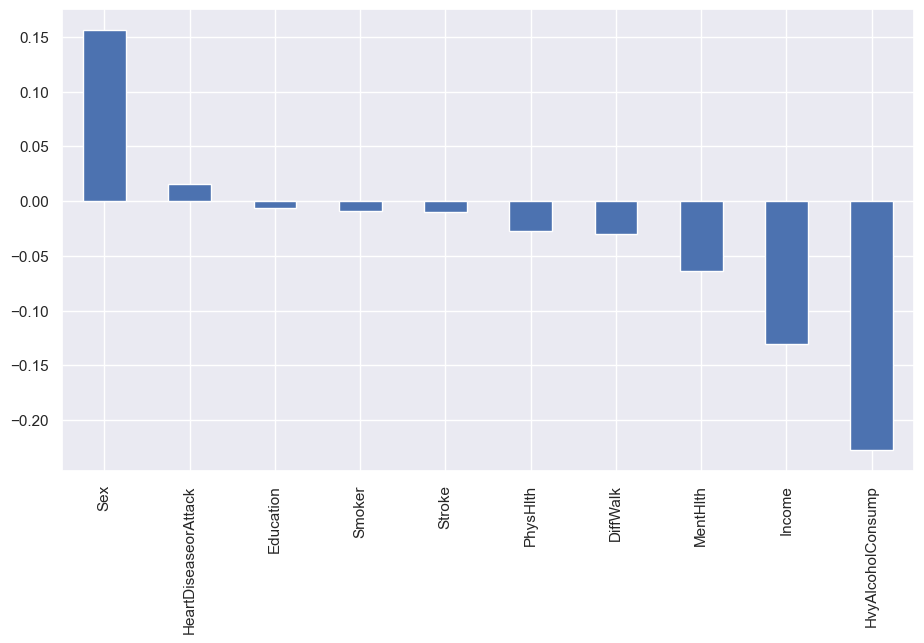

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

As we can see that from the coefficients of Logistic Regression Genral Health, AGe, BMi and HighBP contributed the most for the model to predict the diabetic person.

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_lr = Lr_Classifier.makePrediction(X_test)
y_pred_lr

array([1., 0., 0., ..., 1., 1., 1.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Lr_Classifier.evaluate_model(y_pred_lr, y_test)

Accuracy:  0.7504485082389832


Precision:  0.7371673819742489


Recall:  0.7776402764782228


F1:  0.7568631483086323


Roc_Auc:  0.7504767647451355


Confusion Matrix: 
 [[24014  9186]
 [ 7367 25764]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for Logistic Regression :  </h3>

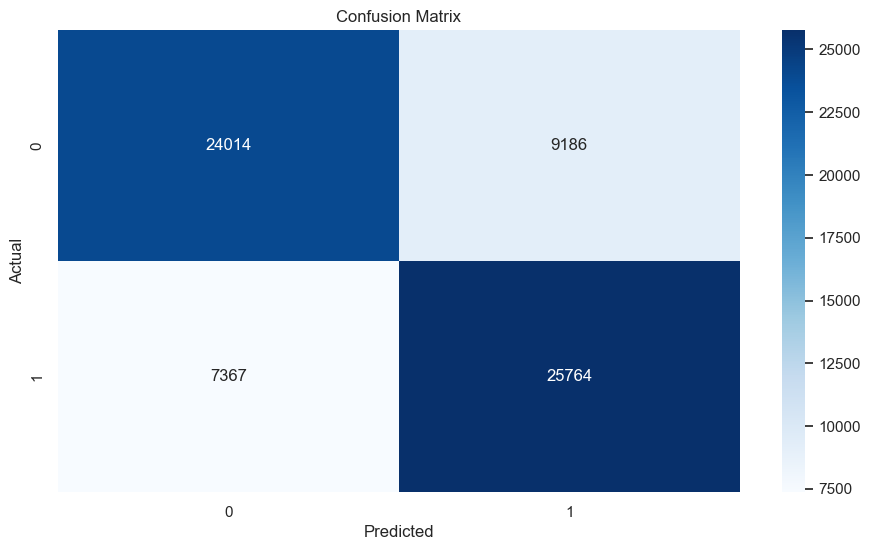

In [ ]:
Lr_Classifier.plot_confusion_matrix(y_test, y_pred_lr)

### Decision Tree Classifier:

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for Decision Tree Classifier  :  </h3>

In [ ]:
Dt_Classifier = MLTrainer_AM(DecisionTreeClassifier())

<h3 style="color:#8B0000;"> Train the Decision Tree Classifier Model using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Dt_Classifier.train_model(X_train, y_train)

DecisionTreeClassifier()

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_dt = Dt_Classifier.makePrediction(X_test)
y_pred_dt

array([1., 0., 0., ..., 0., 1., 0.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Dt_Classifier.evaluate_model(y_pred_dt, y_test)

Accuracy:  0.9016900091963034


Precision:  0.9027180822083661


Recall:  0.9001841175937944


F1:  0.901449319167586


Roc_Auc:  0.9016884443390659


Confusion Matrix: 
 [[29986  3214]
 [ 3307 29824]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for Decision Tree Classifier :  </h3>

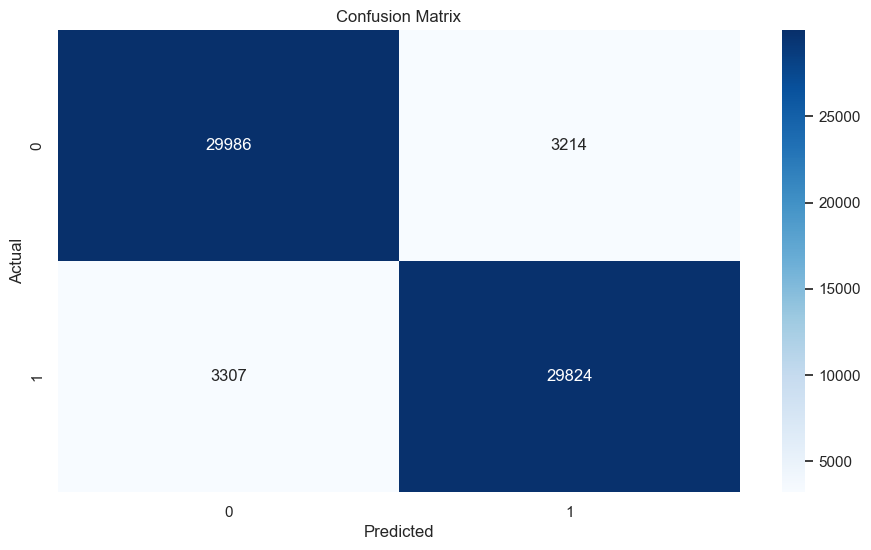

In [ ]:
Dt_Classifier.plot_confusion_matrix(y_test, y_pred_dt)

### Random Forest Classifier:

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for Random Forest Classifier  :  </h3>

In [ ]:
Rf_Classifier = MLTrainer_AM(RandomForestClassifier())

<h3 style="color:#8B0000;"> Train the Random Forest Classifier: using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Rf_Classifier_ = Rf_Classifier.train_model(X_train, y_train)

<h3 style="color:#8B0000;"> Feature importnce given by Random Forest classifer: </h3>

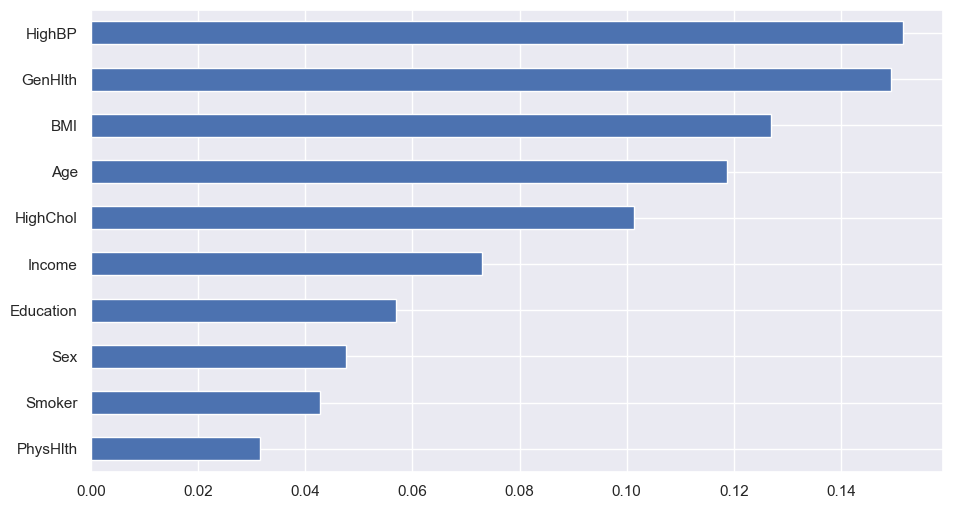

In [ ]:
# Calculating feature importances for Random Forest Classifier
importances = Rf_Classifier_.feature_importances_

# Creating a pandas Series to store importances with feature names as index
weights = pd.Series(importances, index=X_train.columns.values)

# Sorting the importances and selecting the top 10
top_weights = weights.sort_values()[-10:]

# Plotting the top weighted features
top_weights.plot(kind='barh')
plt.show()


For random forest the features which contributed the most for making the model predictions are: General Health, HighBP, AGe and BMI

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_rf = Rf_Classifier.makePrediction(X_test)
y_pred_rf

array([1., 0., 0., ..., 0., 1., 1.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Rf_Classifier.evaluate_model(y_pred_rf, y_test)

Accuracy:  0.9309523450573638


Precision:  0.9533199961893875


Recall:  0.9061302103769883


F1:  0.9291263037355699


Roc_Auc:  0.9309265509716268


Confusion Matrix: 
 [[31730  1470]
 [ 3110 30021]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for Random Forest Classifier: :  </h3>

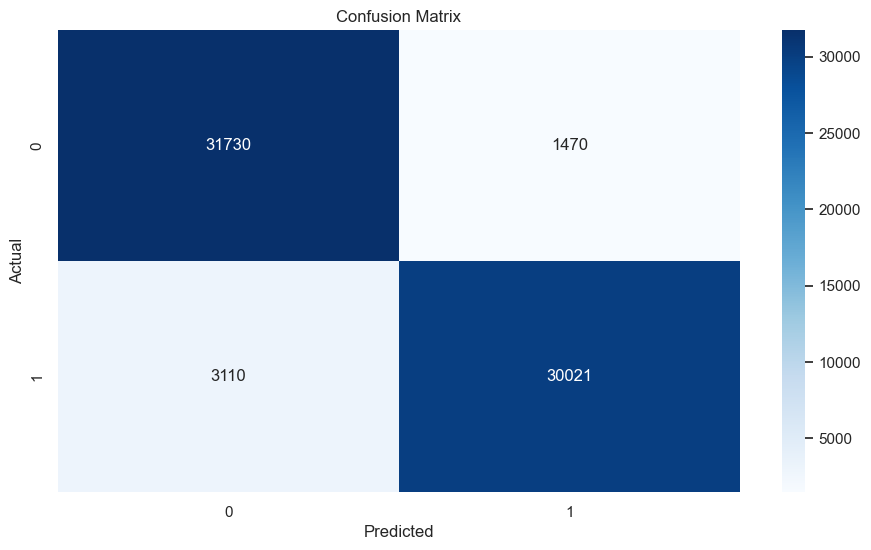

In [ ]:
Rf_Classifier.plot_confusion_matrix(y_test, y_pred_rf)

### KNeighbors Classifier:

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for KNeighbors Classifier  :  </h3>

In [ ]:
Knn_Classifier = MLTrainer_AM(KNeighborsClassifier())

<h3 style="color:#8B0000;"> Train the KNeighbors Classifier Model using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Knn_Classifier.train_model(X_train, y_train)

KNeighborsClassifier()

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_knn = Knn_Classifier.makePrediction(X_test)
y_pred_knn

array([0., 0., 0., ..., 1., 1., 1.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Knn_Classifier.evaluate_model(y_pred_knn, y_test)

Accuracy:  0.8735131386531184


Precision:  0.8391872994982315


Recall:  0.9237873894539856


F1:  0.879457486853826


Roc_Auc:  0.8735653814739808


Confusion Matrix: 
 [[27335  5865]
 [ 2525 30606]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for KNeighbors Classifier :  </h3>

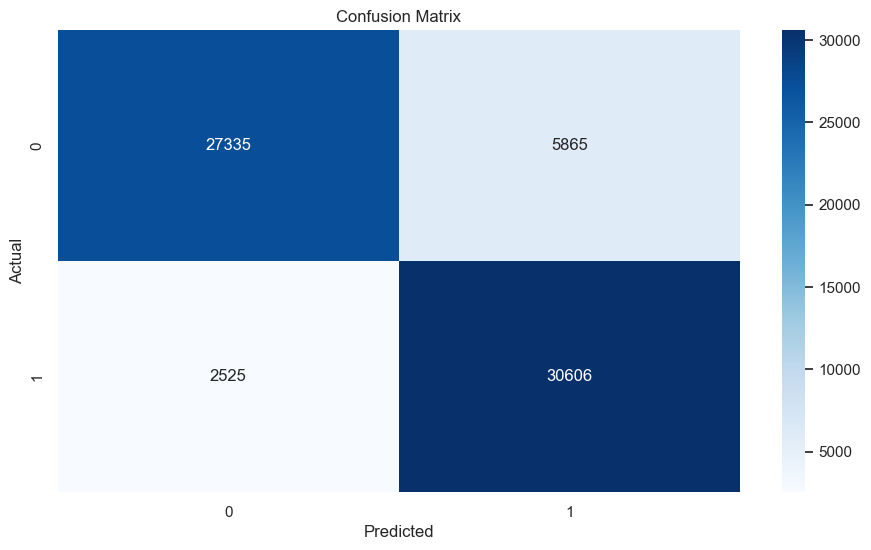

In [ ]:
Knn_Classifier.plot_confusion_matrix(y_test, y_pred_knn)

### MLP Classifier

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for MLP Classifier  :  </h3>

In [ ]:
Mlp_Classifier = MLTrainer_AM(MLPClassifier())

<h3 style="color:#8B0000;"> Train the MLP Classifier Model using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Mlp_Classifier.train_model(X_train, y_train)

MLPClassifier()

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_mlp = Mlp_Classifier.makePrediction(X_test)
y_pred_mlp

array([1., 0., 0., ..., 1., 1., 1.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Mlp_Classifier.evaluate_model(y_pred_mlp, y_test)

Accuracy:  0.8501907102259878


Precision:  0.8921880284071694


Recall:  0.7962935015544355


F1:  0.8415176791438734


Roc_Auc:  0.8501347025844467


Confusion Matrix: 
 [[30012  3188]
 [ 6749 26382]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for MLP Classifier :  </h3>

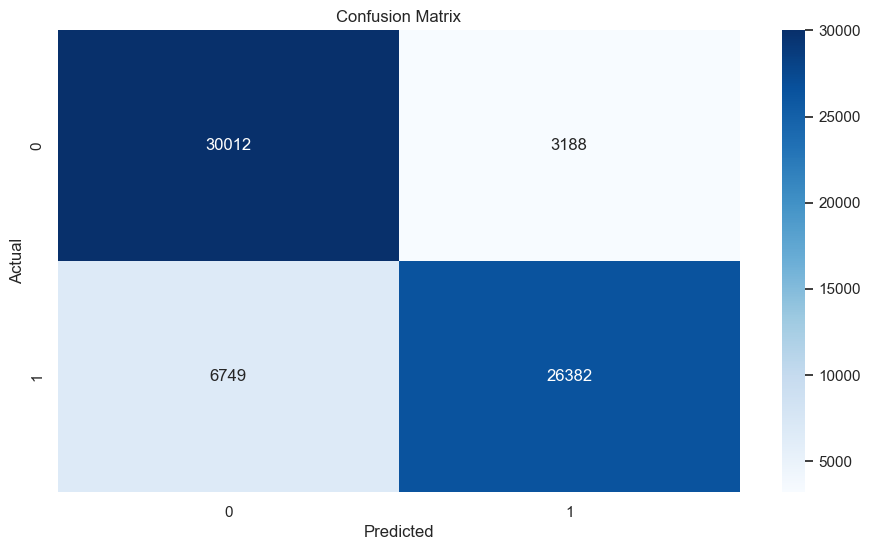

In [ ]:
Mlp_Classifier.plot_confusion_matrix(y_test, y_pred_mlp)

### Gradient Boosting Classifier

<h3 style="color:#8B0000;"> Make an instance of the class MLTrainer_AM from Train_Model_AM module for Gradient Boosting Classifier  :  </h3>

In [ ]:
Gb_Classifier = MLTrainer_AM(GradientBoostingClassifier())

<h3 style="color:#8B0000;"> Train the Gradient Boosting Classifier Model using train_model function of MLTrainer_AM class:  </h3>

In [ ]:
Gb_Classifier.train_model(X_train, y_train)

GradientBoostingClassifier()

<h3 style="color:#8B0000;"> Call the makePrediction function of MLTrainer_AM class to get the predictions on test set:  </h3>

In [ ]:
y_pred_gb = Gb_Classifier.makePrediction(X_test)
y_pred_gb

array([0., 0., 0., ..., 1., 1., 1.])

<h3 style="color:#8B0000;"> Call the evaluate_model function of MLTrainer_AM class to get different Evaluation Scores :  </h3>

In [ ]:
Gb_Classifier.evaluate_model(y_pred_gb, y_test)

Accuracy:  0.8886644253817974


Precision:  0.8882789407009712


Recall:  0.888895596269355


F1:  0.888587161499585


Roc_Auc:  0.888664665604557


Confusion Matrix: 
 [[29496  3704]
 [ 3681 29450]]


<h3 style="color:#8B0000;"> Call the plot_confusion_matrix function of MLTrainer_AM class to Visualize the Confusion Matrix for Gradient Boosting Classifier :  </h3>

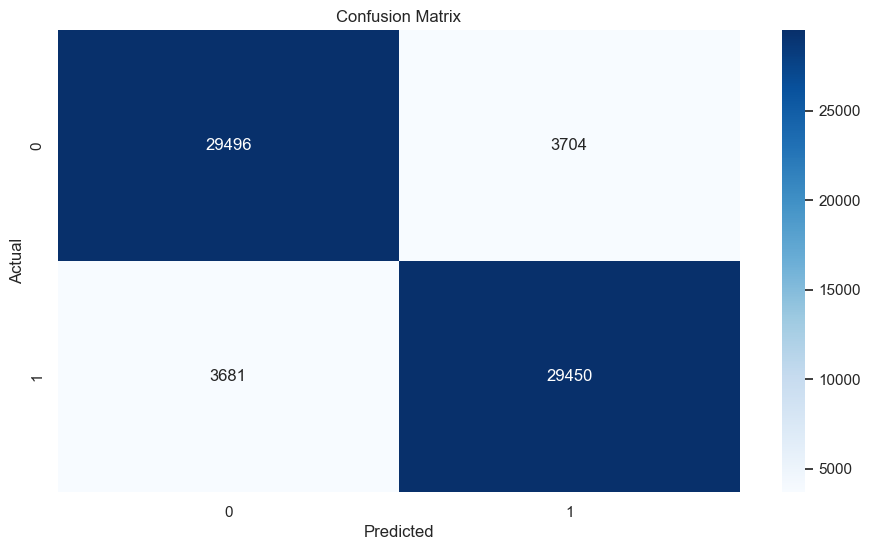

In [ ]:
Gb_Classifier.plot_confusion_matrix(y_test, y_pred_gb)

From the in-depth analysis performed on various machine learning models including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNeighbors Classifier, MLP Classifier, and Gradient Boosting Classifier, several useful discoveries have been made:

**Model Performance:**

The models achieved varying levels of accuracy, precision, recall, and F1 score, indicating differences in their ability to correctly classify instances and handle imbalanced data.
The Random Forest Classifier exhibited the highest overall performance with an accuracy of 93.09%, precision of 95.33%, recall of 90.60%, and F1 score of 92.91%. This suggests that the Random Forest model performed well in predicting both positive and negative instances while maintaining a good balance between precision and recall.
The Decision Tree Classifier also performed well with an accuracy of 90.12%, precision of 90.41%, recall of 89.74%, and F1 score of 90.08%.

**Feature Importance:**

The feature importance analysis conducted using the Random Forest Classifier and Logistic Regression model revealed that variables such as General Health, Age, BMI, and HighBP were among the top contributors to predicting diabetic individuals. This suggests that these variables play a significant role in determining the likelihood of someone being diabetic.



**Model Selection:**

Based on the evaluation metrics and visualizations, the Random Forest Classifier emerged as the top-performing model for predicting diabetes within the given dataset.
The Decision Tree Classifier also demonstrated strong performance and could serve as a suitable alternative, especially considering its simplicity and interpretability.


Overall, the in-depth analysis provided valuable insights into the performance and behavior of different machine learning models in predicting diabetes. These findings can inform the selection of the most suitable model for deployment in practical applications and guide further optimization efforts to improve predictive accuracy and reliability.

### Model Comparison:

<h3 style="color:#8B0000;"> Call the compare_models_performance_GH function of Compare_Models_GH Module for comparing models(in terms of accuracy) in the form of a table  </h3>

In [ ]:
# List of model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'MLP Classifier', 'Gradient Boosting']

# Corresponding accuracy scores
scores = [0.7513, 0.9012, 0.9309, 0.8733, 0.8521, 0.8877]

# Comparing models' performance
performance = compare_models_performance_GH(models, scores)

# Displaying the performance table
performance


,Models,Accuracy_score
2,Random Forest,0.9309
1,Decision Tree,0.9012
5,Gradient Boosting,0.8877
3,KNN Classifier,0.8733
4,MLP Classifier,0.8521
0,Logistic Regression,0.7513


<h3 style="color:#8B0000;"> Call the visualize_model_performance_GH function of Compare_Models_GH Module for comparing models in the form of a bar graph  </h3>

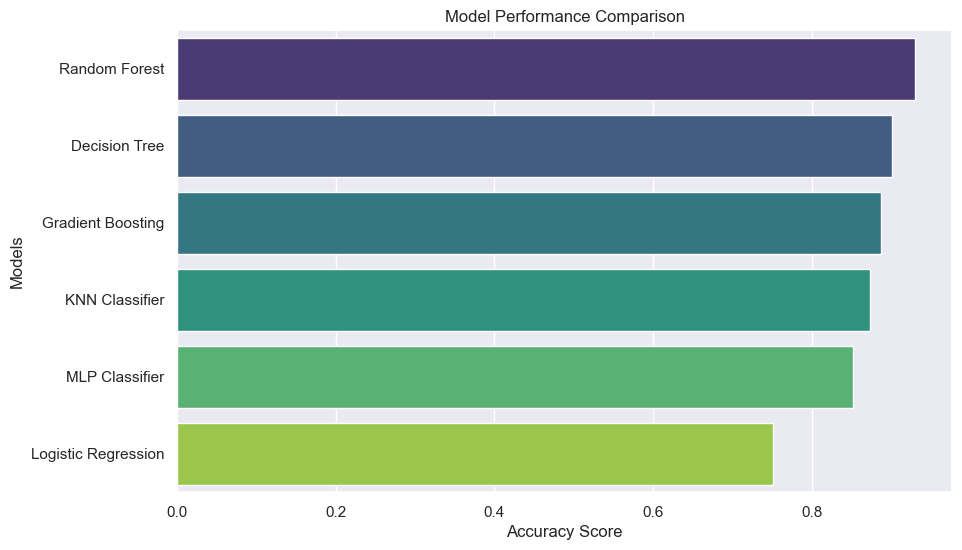

In [ ]:
visualize_model_performance_GH(performance)


**Top Performing Models:**

The Random Forest model exhibited the highest accuracy score of 93.09%, indicating its superiority in accurately predicting diabetic cases within the dataset.


**Performance Ranking:**

The comparison table and bar graph provided a clear ranking of model performance based on accuracy scores, allowing for easy identification of the top-performing models.


**Visualization of Model Performance:**

The bar graph visualization effectively conveyed the differences in accuracy scores among the various models, offering a quick and intuitive understanding of their relative performance.
Models were visually distinguished, making it easier to identify the best-performing models at a glance.



# 6. Communicate Results


The project aimed to predict diabetes using machine learning techniques, covering data collection, preprocessing, in-depth analysis, and model evaluation.

**Data Preparation and Exploration:**

We collected a dataset with 253,680 entries and 22 numerical features. Through exploratory data analysis (EDA), we found imbalanced classes, a mix of binary and continuous features, and no categorical variables. Univariate and multivariate analysis revealed potential predictors like age, BMI, income, and education, and their correlations with diabetes prevalence.

**Data Preprocessing:**

Preprocessing steps, including outlier removal, feature selection, and class imbalance handling, improved data quality. SMOTE addressed class imbalance, while feature selection identified relevant predictors. Data standardization ensured uniformity across features.

**Model Evaluation:**

We evaluated several machine learning models, including Logistic Regression, Decision Tree, Random Forest, KNeighbors, MLP Classifier, and Gradient Boosting. Each model underwent rigorous evaluation based on metrics like accuracy, precision, recall, and F1 score. The Random Forest model achieved the highest accuracy score of 93.09%, followed closely by the Decision Tree model.

**Conclusion:**

This project demonstrated the effectiveness of machine learning in predicting diabetes. Through regirous data exploration, preprocessing, and model evaluation, we gained insights into the factors influencing diabetes and identified reliable predictors. The Random Forest model emerged as the most accurate predictor with 93% accuracy, offering valuable tools for early detection and intervention in diabetes management. Ongoing research and model refinement will further enhance predictive accuracy and contribute to improved public health outcomes.